<a href="https://colab.research.google.com/github/soumya-dash3/LUFlow-Live-Network-Intrusion-Detection/blob/main/Copy_of_Minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 177.6/177.6 MB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.40.0.3-py2.py3-none-any.whl size=177694727 sha256=0bb81c0ce25d29a5f69338edf4be8e3ecab576171e4dbdec913e7cd89f0be61e
  Stored in directory: /root/.cache/pip/wheels/9a/54/b6/c9ab3e71309ef0000bbe39e715020dc151bbfc557784b7f4c9
Successfully built h2o


In [ ]:
pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd


In [ ]:
# read an example file - 2020/10/01
df = pd.read_csv("Data.csv")
# first glance
df.head()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,label,duration
0,351.18182,1359,745,786,22,6.922611,13,13,6,45090,35758,1594432253586052,1594432249501126,14565.1740,malicious,4.084926
1,123.75000,270,191,786,445,4.573646,6,6,6,52444,57366,1594432254051291,159443225308942,2108.4507,outlier,0.961871
2,1657.40000,270,192,786,445,4.570325,9,8,6,7713,50230,1594432254098993,1594432243076749,2111.4900,malicious,11.022244
3,491.80328,630,14756,786,9300,2.240096,61,30,6,786,35178,159443282815022,1594432798118022,34466.1200,benign,30.032198
4,2891.50000,672,5249,786,9200,4.743368,4,4,6,786,35178,1594432833863547,1594432822296382,28085.4800,benign,11.567165


In [ ]:
df.shape

(123030, 16)

In [ ]:
df.describe()

,avg_ipt,bytes_in,bytes_out,dest_ip,dest_port,entropy,num_pkts_out,num_pkts_in,proto,src_ip,src_port,time_end,time_start,total_entropy,duration
count,1.230300e+05,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,123030.000000,1.230300e+05,1.230300e+05,1.230300e+05,123030.000000
mean,6.390202e+06,1827.318077,4636.929123,3450.444290,5930.923214,3.209389,10.125425,7.605210,7.364488,27488.571113,37984.841876,1.448251e+15,1.448033e+15,3.698387e+04,5.916926
std,7.590629e+07,7089.248353,10814.239410,10715.121779,9340.902133,3.796621,25.038877,23.125236,4.731404,49105.857781,20927.240103,4.367831e+14,4.370609e+14,2.260567e+05,9.797932
min,0.000000e+00,0.000000,0.000000,174.000000,0.000000,0.000000,0.000000,0.000000,1.000000,4.000000,0.000000,1.594430e+10,1.594439e+10,0.000000e+00,0.000000
25%,0.000000e+00,0.000000,47.000000,786.000000,53.000000,0.984530,1.000000,1.000000,6.000000,786.000000,32349.000000,1.594431e+15,1.594431e+15,1.102674e+02,0.005332
50%,1.850000e+01,270.000000,191.000000,786.000000,1900.000000,3.129168,4.000000,1.000000,6.000000,786.000000,40048.000000,1.594452e+15,1.594452e+15,2.112651e+03,0.377161
75%,3.325464e+02,354.000000,2850.000000,786.000000,9200.000000,4.857786,6.000000,6.000000,6.000000,40065.000000,56410.750000,1.594476e+15,1.594476e+15,2.198283e+04,7.244165
max,4.294967e+09,65428.000000,65534.000000,263462.000000,65535.000000,69.878500,255.000000,255.000000,58.000000,397651.000000,65534.000000,1.594512e+15,1.594512e+15,3.905011e+06,56.718502


In [ ]:
import numpy as np
import time

# plots
import matplotlib.pyplot as plt
import plotly.express as px

# statistics
from statsmodels.graphics.mosaicplot import mosaic

In [ ]:
plt.rcParams['figure.figsize']=(7,4)

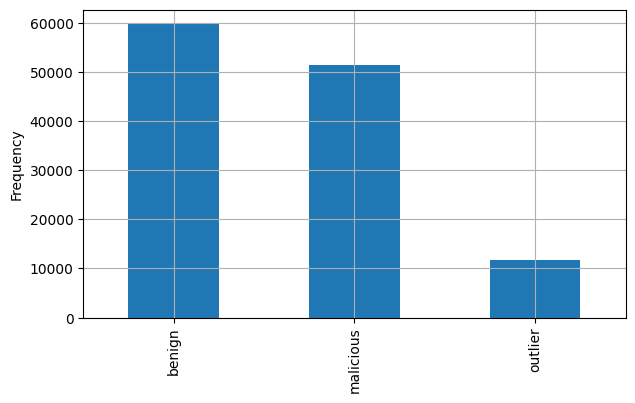

In [ ]:
df.label.value_counts().plot(kind='bar')
plt.ylabel('Frequency')
plt.grid()
plt.show()

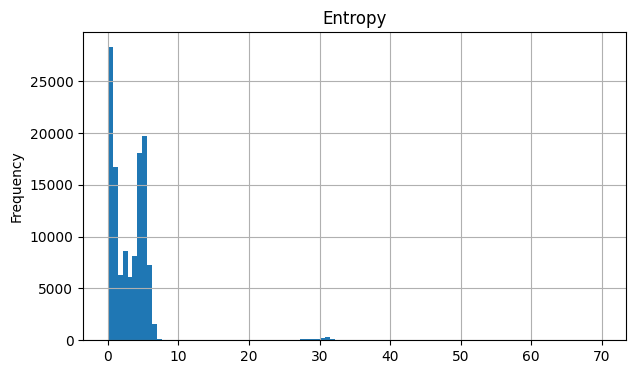

In [ ]:
df.entropy.plot(kind='hist', bins=100)
plt.title('Entropy')
plt.grid()
plt.show()


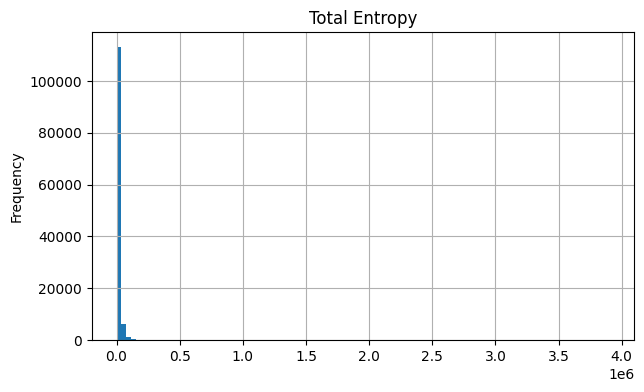

In [ ]:
df.total_entropy.plot(kind='hist', bins=100)
plt.title('Total Entropy')
plt.grid()
plt.show()

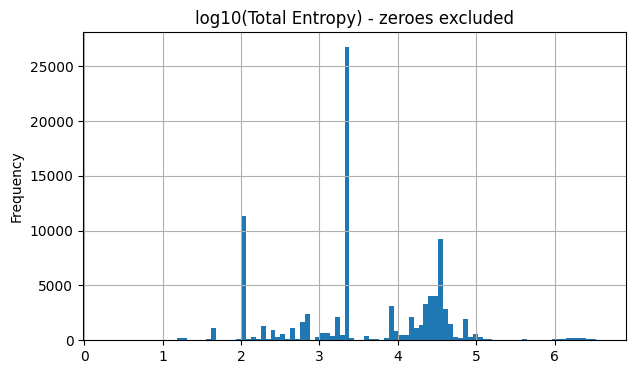

In [ ]:
total_entropy_pos = df.total_entropy[df.total_entropy>0]
# show log plot
plt.hist(np.log10(total_entropy_pos),100)
plt.ylabel('Frequency')
plt.title('log10(Total Entropy) - zeroes excluded')
plt.grid()
plt.show()

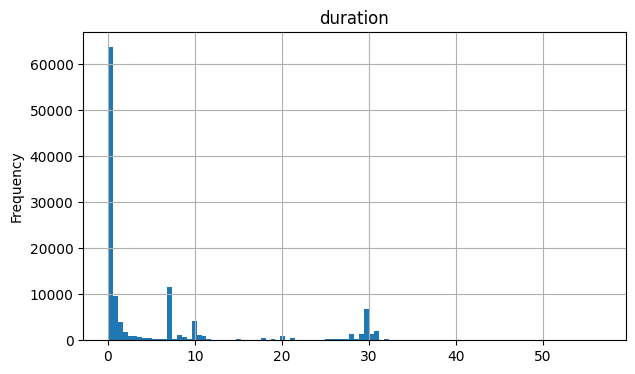

In [ ]:
df.duration.plot(kind='hist', bins=100)
plt.title('duration')
plt.grid()
plt.show()

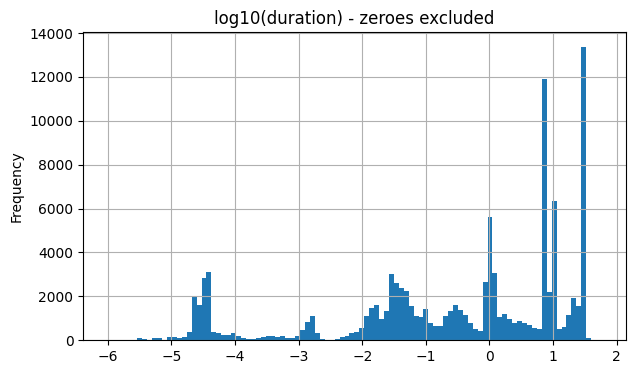

In [ ]:
duration_pos = df.duration[df.duration>0]
# show log plot
plt.hist(np.log10(duration_pos),100)
plt.ylabel('Frequency')
plt.title('log10(duration) - zeroes excluded')
plt.grid()
plt.show()

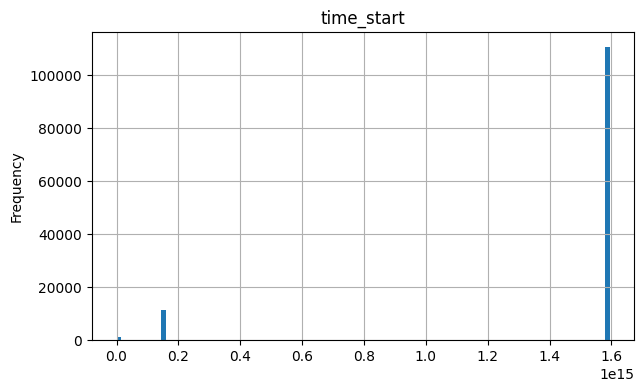

In [ ]:
df.time_start.plot(kind='hist', bins=100)
plt.title('time_start')
plt.grid()
plt.show()

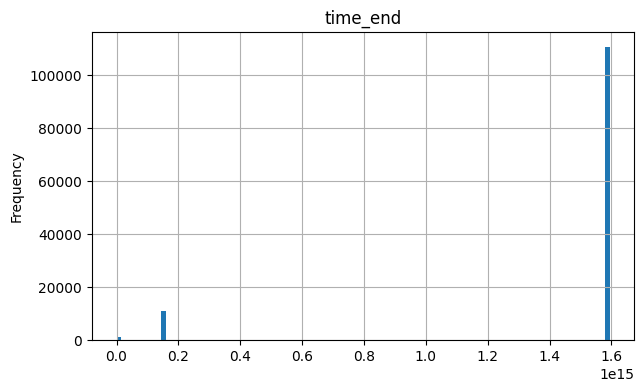

In [ ]:
df.time_end.plot(kind='hist', bins=100)
plt.title('time_end')
plt.grid()
plt.show()

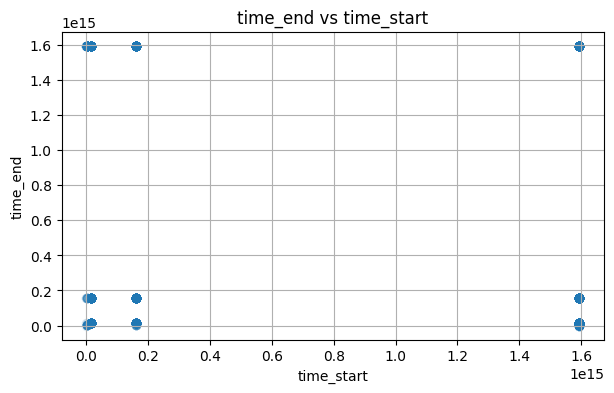

In [ ]:
plt.scatter(df.time_start, df.time_end, alpha=0.1)
plt.xlabel('time_start')
plt.ylabel('time_end')
plt.title('time_end vs time_start')
plt.grid()
plt.show()

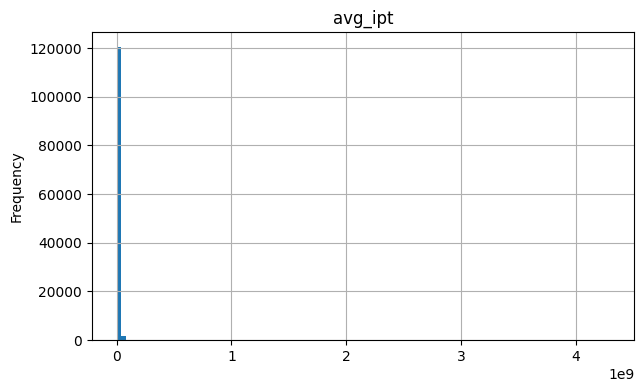

In [ ]:
df.avg_ipt.plot(kind='hist', bins=100)
plt.title('avg_ipt')
plt.grid()
plt.show()

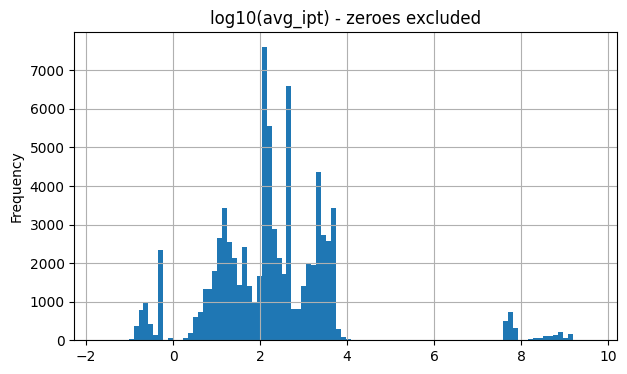

In [ ]:
# look at non-zeroes only
avg_ipt_pos = df.avg_ipt[df.avg_ipt>0]
# show log plot
plt.hist(np.log10(avg_ipt_pos),100)
plt.ylabel('Frequency')
plt.title('log10(avg_ipt) - zeroes excluded')
plt.grid()
plt.show()

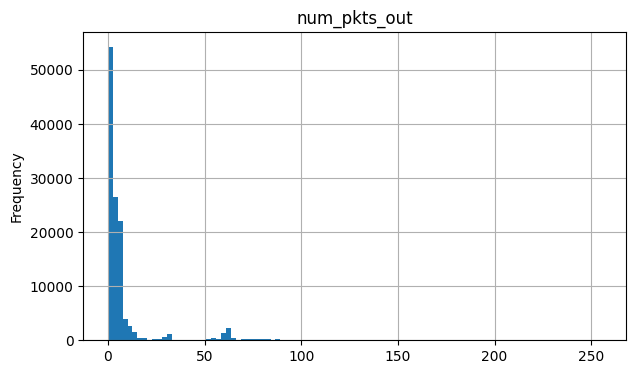

In [ ]:
df.num_pkts_out.plot(kind='hist', bins=100)
plt.title('num_pkts_out')
plt.grid()
plt.show()

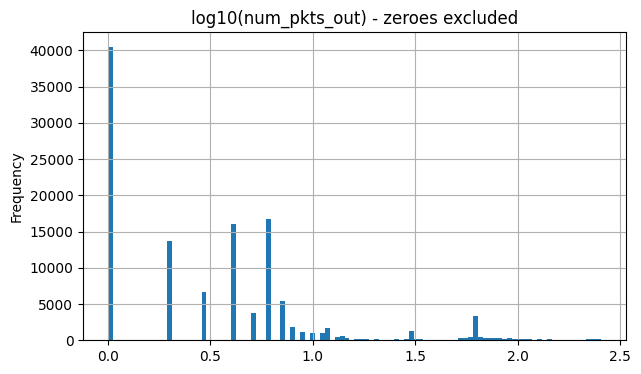

In [ ]:
# look at non-zeroes only
num_pkts_out_pos = df.num_pkts_out[df.num_pkts_out>0]
# show log plot
plt.hist(np.log10(num_pkts_out_pos),100)
plt.ylabel('Frequency')
plt.title('log10(num_pkts_out) - zeroes excluded')
plt.grid()
plt.show()

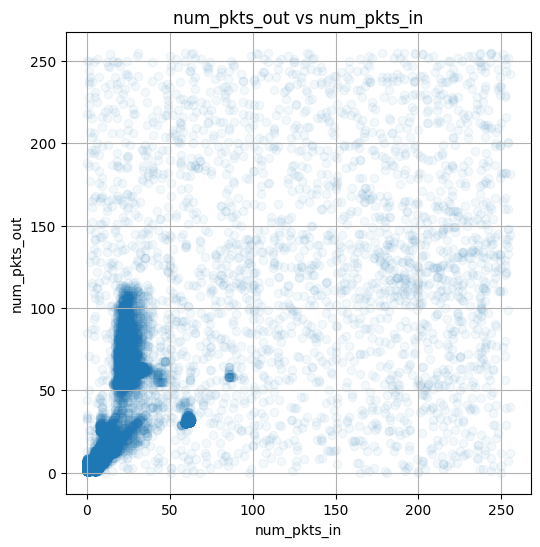

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.num_pkts_in, df.num_pkts_out, alpha=0.05)
plt.xlabel('num_pkts_in')
plt.ylabel('num_pkts_out')
plt.title('num_pkts_out vs num_pkts_in')
plt.grid()
plt.show()

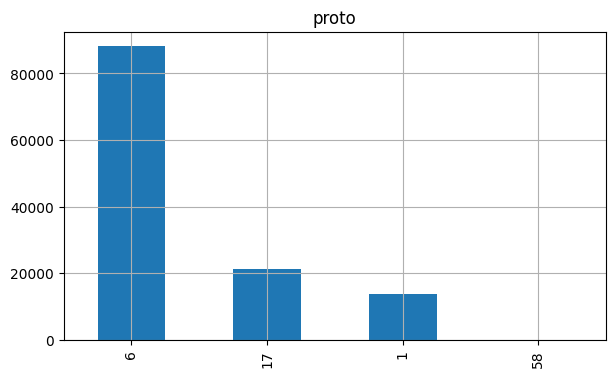

In [ ]:
df.proto.value_counts().plot(kind='bar')
plt.title('proto')
plt.grid()
plt.show()

In [ ]:
pd.crosstab(df.proto, df.label)

label,benign,malicious,outlier
proto,,,
1,0,12474,1094
6,52840,31789,3494
17,6903,7228,7184
58,24,0,0


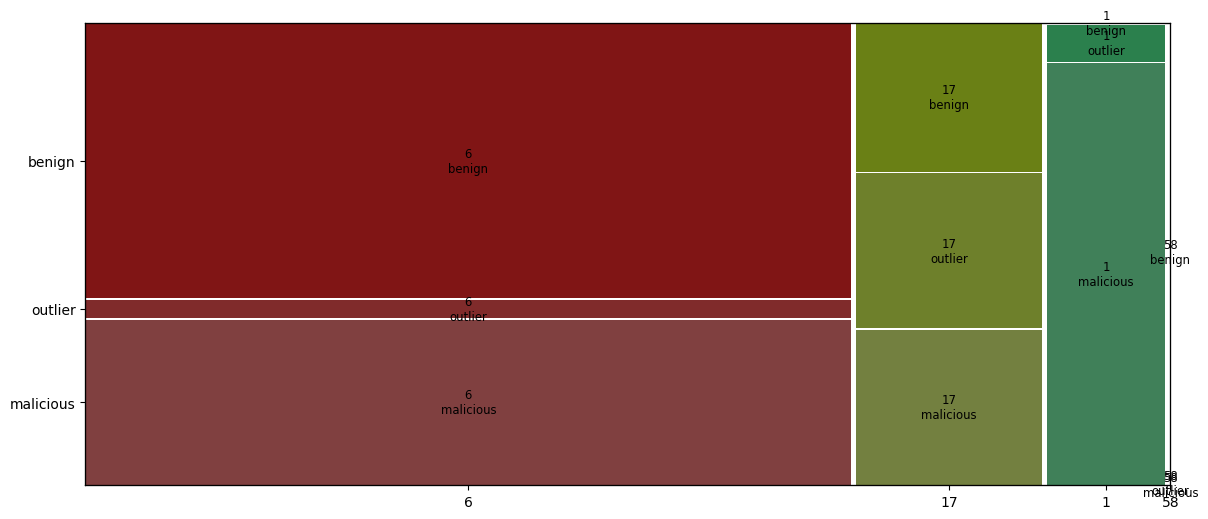

In [ ]:
rcpar_save = plt.rcParams['figure.figsize']
plt.rcParams['figure.figsize']=(14,6)
mosaic(df, ['proto','label'])
plt.show()

plt.rcParams['figure.figsize'] = rcpar_save # reset plot size to previous status

In [ ]:
df.src_ip.value_counts()

786       61907
16509     10232
40065      3627
49453      2867
45899      2635
          ...  
24835         1
207959        1
1136          1
14080         1
5617          1
Name: src_ip, Length: 565, dtype: int64

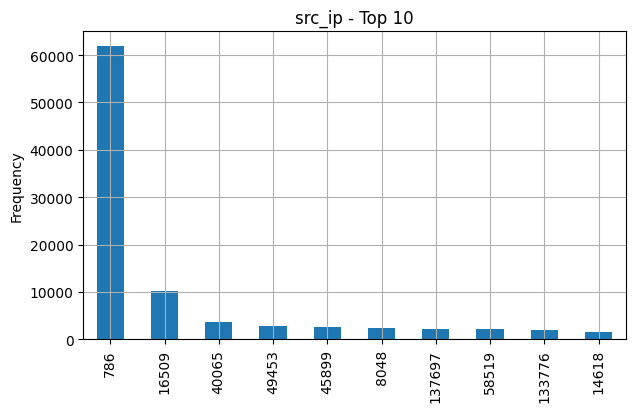

In [ ]:
df.src_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_ip - Top 10')
plt.grid()
plt.show()


In [ ]:
df.dest_ip.value_counts()

786       105695
15169      15222
61337        270
20115        160
202425       157
           ...  
2637           1
58461          1
3269           1
4847           1
18881          1
Name: dest_ip, Length: 125, dtype: int64

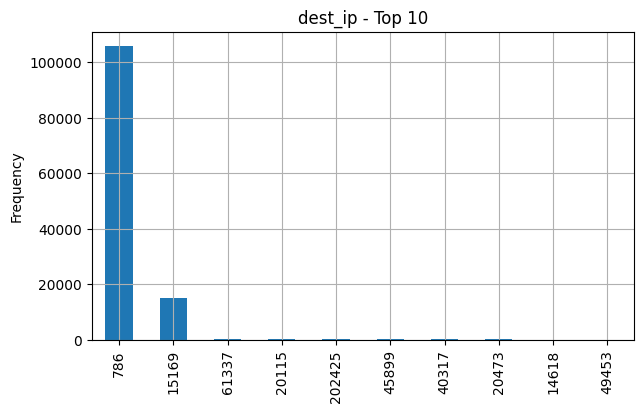

In [ ]:
df.dest_ip.value_counts()[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_ip - Top 10')
plt.grid()
plt.show()

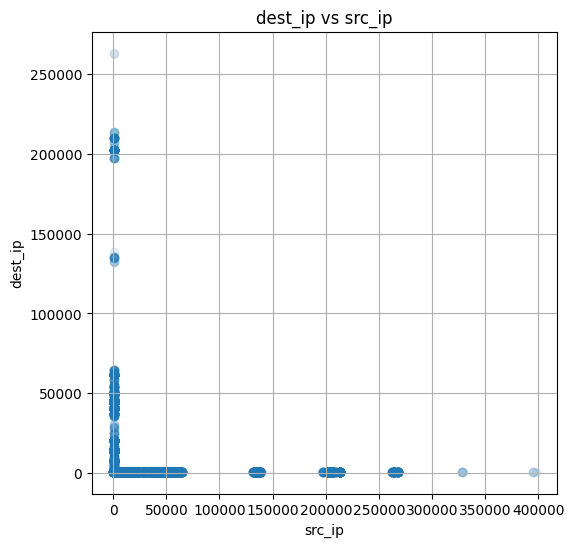

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.src_ip, df.dest_ip, alpha=0.1)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

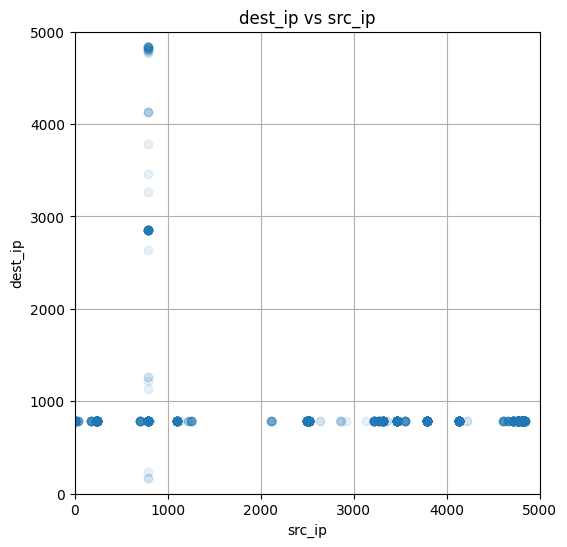

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.src_ip, df.dest_ip, alpha=0.1)
plt.xlim(0,5000)
plt.ylim(0,5000)
plt.xlabel('src_ip')
plt.ylabel('dest_ip')
plt.title('dest_ip vs src_ip')
plt.grid()
plt.show()

In [ ]:
df['IP_pair'] = df.src_ip.astype(str) + ' >> ' + df.dest_ip.astype(str)
df.IP_pair.value_counts()[0:20]

786 >> 786       44572
786 >> 15169     15222
16509 >> 786     10232
40065 >> 786      3627
49453 >> 786      2867
45899 >> 786      2635
8048 >> 786       2473
137697 >> 786     2300
58519 >> 786      2113
133776 >> 786     1996
14618 >> 786      1664
132203 >> 786     1318
49505 >> 786      1303
202425 >> 786     1267
7713 >> 786       1252
7552 >> 786       1230
8452 >> 786       1138
3786 >> 786       1116
2519 >> 786       1113
17676 >> 786      1106
Name: IP_pair, dtype: int64

In [ ]:
fig = px.treemap(df, path=['src_ip','dest_ip'], title='Source IP => Destination IP',
                 width=1000, height=800)
fig.show()

In [ ]:
df.src_port.value_counts()

0        13592
35178     4931
35206     3124
35202     3118
35204     3083
         ...  
42674        1
32332        1
34122        1
34124        1
42012        1
Name: src_port, Length: 31416, dtype: int64

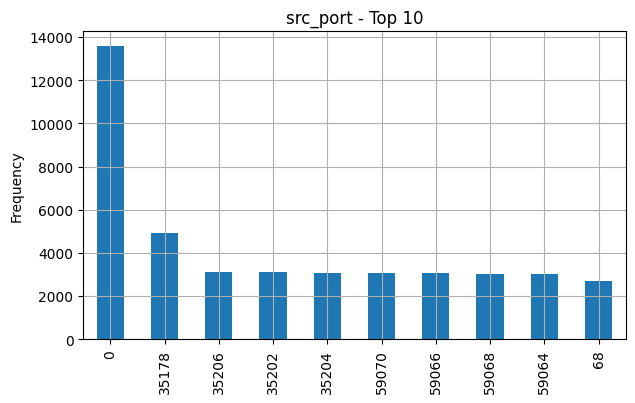

In [ ]:
df.src_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('src_port - Top 10')
plt.grid()
plt.show()

In [ ]:
df.dest_port.value_counts()

9200     26772
445      16927
53       15222
0        13592
1900     13473
         ...  
24581        1
16111        1
17136        1
3403         1
6711         1
Name: dest_port, Length: 8782, dtype: int64

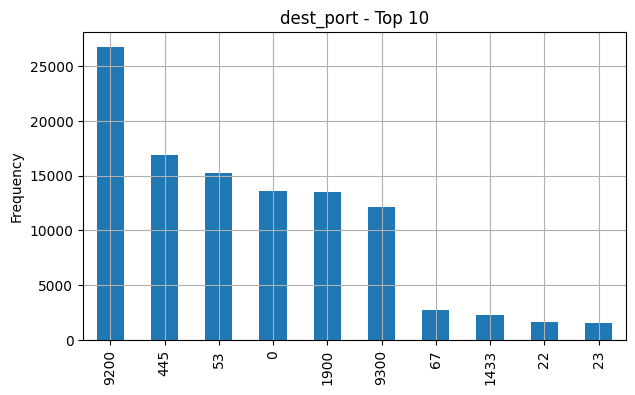

In [ ]:
df.dest_port.value_counts().iloc[0:10].plot(kind='bar')
plt.ylabel('Frequency')
plt.title('dest_port - Top 10')
plt.grid()
plt.show()

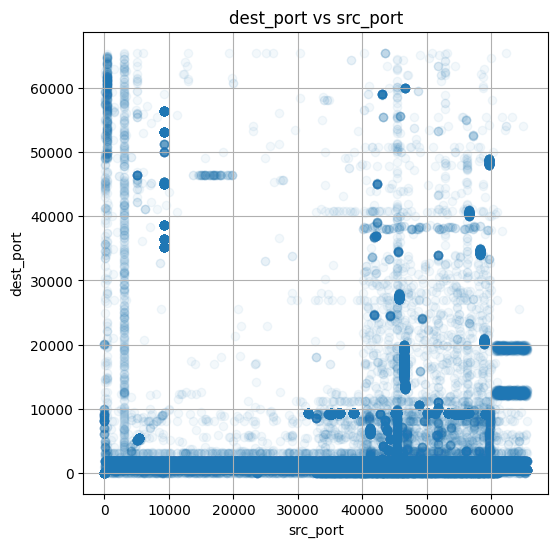

In [ ]:
plt.figure(figsize=(6,6))
plt.scatter(df.src_port, df.dest_port, alpha=0.05)
plt.xlabel('src_port')
plt.ylabel('dest_port')
plt.title('dest_port vs src_port')
plt.grid()
plt.show()

In [ ]:
df['port_pair'] = df.src_port.astype(str) + ' >> ' + df.dest_port.astype(str)
df.port_pair.value_counts()[0:20]

0 >> 0           13592
35206 >> 9200     3122
35178 >> 9200     3117
35202 >> 9200     3117
35204 >> 9200     3082
59070 >> 9200     3061
59066 >> 9200     3046
59068 >> 9200     3038
59064 >> 9200     3036
68 >> 67          2713
38612 >> 9300     2694
38624 >> 9300     1885
35178 >> 9300     1812
38604 >> 9300     1004
38642 >> 9300      926
38618 >> 9300      860
9300 >> 35178      807
9300 >> 38624      745
123 >> 123         372
54332 >> 9200      259
Name: port_pair, dtype: int64

In [ ]:
features = df.columns
features = features.drop(['label'])
features = list(features)
print(features)

['avg_ipt', 'bytes_in', 'bytes_out', 'dest_ip', 'dest_port', 'entropy', 'num_pkts_out', 'num_pkts_in', 'proto', 'src_ip', 'src_port', 'time_end', 'time_start', 'total_entropy', 'duration', 'IP_pair', 'port_pair']


In [ ]:
h2o.init(max_mem_size='12G', nthreads=4)

Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.18" 2023-01-17; OpenJDK Runtime Environment (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1); OpenJDK 64-Bit Server VM (build 11.0.18+10-post-Ubuntu-0ubuntu120.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.9/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpmgjsmaic
  JVM stdout: /tmp/tmpmgjsmaic/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpmgjsmaic/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.40.0.3
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_unknownUser_mij54a
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,12 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
t1 = time.time()
df_hex = h2o.H2OFrame(df)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  7.63


In [ ]:
target = 'label'
# explicitly convert target to categorical => classification problem
df_hex[target] = df_hex[target].asfactor()

In [ ]:
train_hex, test_hex = df_hex.split_frame(ratios=[0.8], seed=999)

In [ ]:
fit_DRF = H2ORandomForestEstimator(ntrees=10,
                                   max_depth=5,
                                   min_rows=10,
                                   nfolds=5,
                                   seed=999)

In [ ]:
t1 = time.time()
fit_DRF.train(x=features,
              y=target,
              training_frame=train_hex)
t2 = time.time()
print('Elapsed time [s]: ', np.round(t2-t1,2))

drf Model Build progress: |██████████████████████████████████████████████████████| (done) 100%
Elapsed time [s]:  19.45


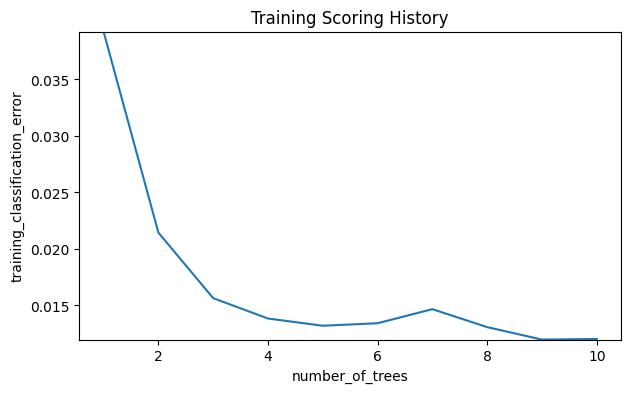

In [ ]:
fit_DRF.plot()

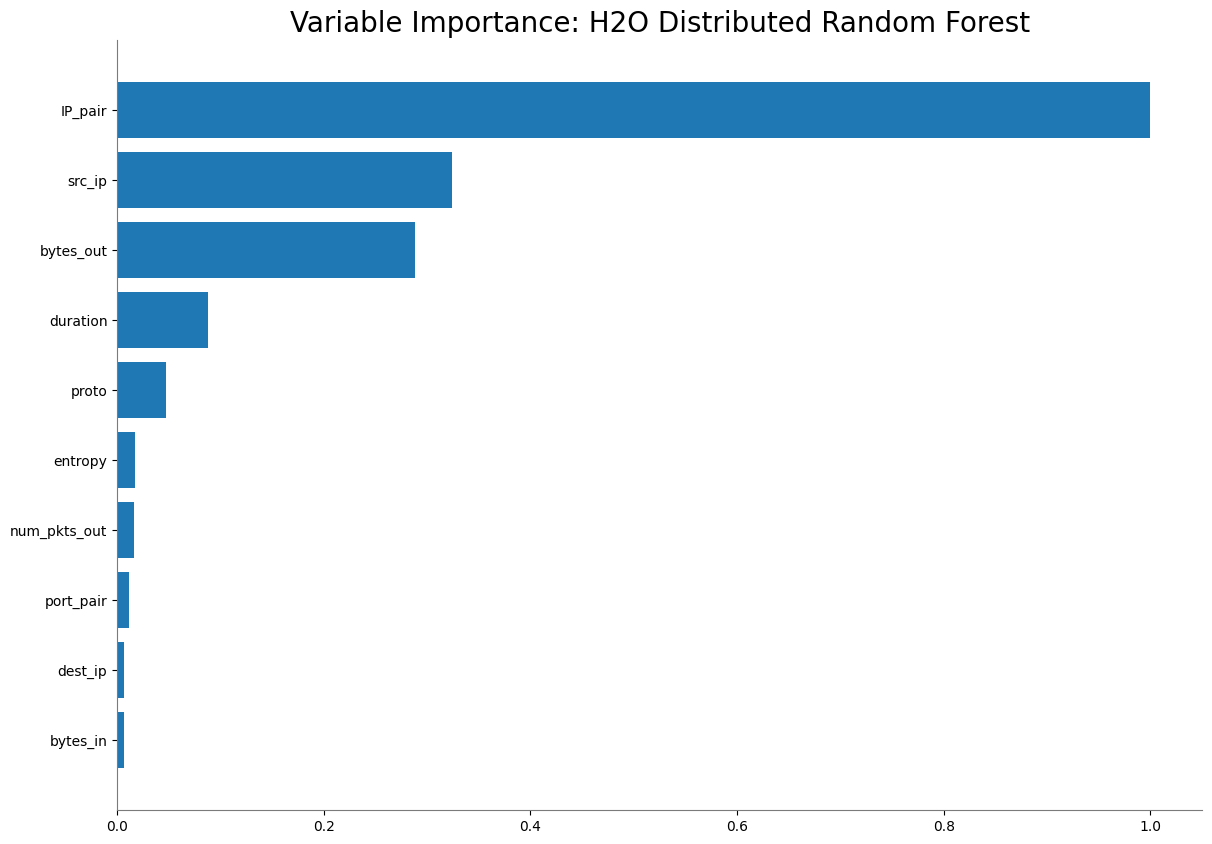

<Figure size 700x400 with 0 Axes>

In [ ]:
fit_DRF.varimp_plot()

In [ ]:
perf_train = fit_DRF.model_performance(train=True)
perf_train

ModelMetricsMultinomial: drf
** Reported on train data. **

MSE: 0.012847221874952176
RMSE: 0.11334558604088725
LogLoss: 0.052172899246909626
Mean Per-Class Error: 0.015448807093480675
AUC table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).
AUCPR table was not computed: it is either disabled (model parameter 'auc_type' was set to AUTO or NONE) or the domain size exceeds the limit (maximum is 50 domains).

Confusion Matrix: Row labels: Actual class; Column labels: Predicted class
benign    malicious    outlier    Error        Rate
--------  -----------  ---------  -----------  --------------
47257     1            0          2.11604e-05  1 / 47,258
32        39810        923        0.023427     955 / 40,765
25        188          9089       0.0228983    213 / 9,302
47314     39999        10012      0.0120113    1,169 / 97,325

Top-3 Hit Ratios: 
k    hit_ratio
---  -----------
1    0.987989
2    0.999774
3    1

In [ ]:
fit_DRF.cross_validation_metrics_summary()

,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
accuracy,0.9892657,0.0003317,0.9892101,0.9892647,0.989711,0.9893568,0.9887858
auc,nan,0.0,nan,nan,nan,nan,nan
err,0.0107343,0.0003317,0.0107899,0.0107353,0.0102890,0.0106432,0.0112142
err_count,211.2,5.9329586,212.0,212.0,204.0,208.0,220.0
logloss,0.0507444,0.0022896,0.0527712,0.0529334,0.0474060,0.0508248,0.0497864
max_per_class_error,0.0232485,0.0005620,0.0236909,0.0224113,0.0231943,0.0231100,0.0238357
mean_per_class_accuracy,0.9888815,0.0010953,0.9893707,0.9880055,0.9903569,0.989052,0.9876221
mean_per_class_error,0.0111186,0.0010953,0.0106293,0.0119945,0.0096432,0.0109480,0.0123779
mse,0.0114874,0.0004380,0.0119697,0.0114919,0.0107844,0.0116884,0.0115024
pr_auc,nan,0.0,nan,nan,nan,nan,nan


In [ ]:
pred_test = fit_DRF.predict(test_hex)

drf prediction progress: |███████████████████████████████████████████████████████| (done) 100%


In [ ]:
# add actual target
pred_test['target'] = test_hex['label']
# and convert to pandas data frame
pred_test = pred_test.as_data_frame()

In [ ]:
pred_test.tail(10)

,predict,benign,malicious,outlier,target
24636,benign,0.999138,0.000036,0.000826,benign
24637,benign,0.999939,0.000021,0.000040,benign
24638,benign,0.999570,0.000021,0.000409,benign
24639,malicious,0.000008,0.993930,0.006062,malicious
24640,benign,0.999563,0.000037,0.000400,benign
24641,benign,0.999948,0.000021,0.000031,benign
24642,benign,0.999147,0.000036,0.000817,benign
24643,benign,0.999563,0.000037,0.000400,benign
24644,benign,0.999523,0.000021,0.000457,benign
24645,benign,0.999563,0.000037,0.000400,benign


In [ ]:
pd.crosstab(pred_test.predict, pred_test.target)

target,benign,malicious,outlier
predict,,,
benign,12003,8,4
malicious,0,10032,14
outlier,0,239,2346


In [ ]:
pip install seaborn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline